In [1]:
import numpy as np
import pandas as pd

from datetime import datetime,timedelta

import matplotlib.pyplot as plt
import seaborn as sns


# import sklearn

In [2]:
df = pd.read_csv('Retail_grouped.csv')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,CustomerID,Country,UnitPriceImp,Category
0,536365.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,17850.0,United Kingdom,2.55,clothes
1,536365.0,71053.0,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,17850.0,United Kingdom,3.39,electronics
2,536365.0,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,17850.0,United Kingdom,2.75,clothes
3,536365.0,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,17850.0,United Kingdom,3.39,food
4,536365.0,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,17850.0,United Kingdom,3.39,clothes
...,...,...,...,...,...,...,...,...,...
541904,581587.0,22613.0,PACK OF 20 SPACEBOY NAPKINS,12.0,2011-12-09 12:50:00,12680.0,France,0.85,stationery
541905,581587.0,22899.0,CHILDREN'S APRON DOLLY GIRL,6.0,2011-12-09 12:50:00,12680.0,France,2.10,kitchen
541906,581587.0,23254.0,CHILDRENS CUTLERY DOLLY GIRL,4.0,2011-12-09 12:50:00,12680.0,France,4.15,furniture
541907,581587.0,23255.0,CHILDRENS CUTLERY CIRCUS PARADE,4.0,2011-12-09 12:50:00,12680.0,France,4.15,furniture


In [3]:
df['Category'].value_counts()

kitchen        132520
furniture      108812
clothes        103272
stationery      79637
food            68432
electronics     27558
chemicals       18381
NONE             3297
Name: Category, dtype: int64

In [4]:
df[df['Category'] =='NONE']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,CustomerID,Country,UnitPriceImp,Category
45,536370.0,POST,POSTAGE,3.0,2010-12-01 08:45:00,12583.0,France,18.00,NONE
141,C536379,D,Discount,-1.0,2010-12-01 09:41:00,14527.0,United Kingdom,27.50,NONE
386,536403.0,POST,POSTAGE,1.0,2010-12-01 11:27:00,12791.0,Netherlands,15.00,NONE
1123,536527.0,POST,POSTAGE,1.0,2010-12-01 13:04:00,12662.0,Germany,18.00,NONE
1423,536540.0,C2,CARRIAGE,1.0,2010-12-01 14:05:00,14911.0,EIRE,50.00,NONE
...,...,...,...,...,...,...,...,...,...
541540,581498.0,DOT,DOTCOM POSTAGE,1.0,2011-12-09 10:26:00,1.0,United Kingdom,1714.17,NONE
541541,C581499,M,Manual,-1.0,2011-12-09 10:28:00,15498.0,United Kingdom,224.69,NONE
541730,581570.0,POST,POSTAGE,1.0,2011-12-09 11:59:00,12662.0,Germany,18.00,NONE
541767,581574.0,POST,POSTAGE,2.0,2011-12-09 12:09:00,12526.0,Germany,18.00,NONE


In [5]:
df = df[df['CustomerID']!=1]

# Taking non 1 values, since values of 1 were assigned to empty entries

# Recency

In [6]:
df['InvoiceDateOnly'] = df['InvoiceDate'].apply(lambda x: datetime.strptime(x.split()[0][2:], '%y-%m-%d'))
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   InvoiceNo        406829 non-null  object        
 1   StockCode        406829 non-null  object        
 2   Description      406829 non-null  object        
 3   Quantity         406829 non-null  float64       
 4   InvoiceDate      406829 non-null  object        
 5   CustomerID       406829 non-null  float64       
 6   Country          406829 non-null  object        
 7   UnitPriceImp     406829 non-null  float64       
 8   Category         406829 non-null  object        
 9   InvoiceDateOnly  406829 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(6)
memory usage: 34.1+ MB


/var/folders/14/2y5rr6nj0b98tdl4t1gff_v00000gp/T/ipykernel_16669/827424589.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDateOnly'] = df['InvoiceDate'].apply(lambda x: datetime.strptime(x.split()[0][2:], '%y-%m-%d'))


In [7]:
df_recency = df.copy()
df_recency = df_recency.groupby(by='CustomerID',as_index=False)['InvoiceDateOnly'].max()
df_recency.columns = ['CustomerID','max_date']

df_recency

,CustomerID,max_date
0,12346.0,2011-01-18
1,12347.0,2011-12-07
2,12348.0,2011-09-25
3,12349.0,2011-11-21
4,12350.0,2011-02-02
...,...,...
4367,18280.0,2011-03-07
4368,18281.0,2011-06-12
4369,18282.0,2011-12-02
4370,18283.0,2011-12-06


In [8]:
ref_time = max(df_recency['max_date']) + timedelta(days = 10)
ref_time

Timestamp('2011-12-19 00:00:00')

In [9]:
df_recency['Recency'] = df_recency['max_date'].apply(lambda row: (ref_time - row).days)
df_recency.drop('max_date', axis=1, inplace=True)
df_recency

,CustomerID,Recency
0,12346.0,335
1,12347.0,12
2,12348.0,85
3,12349.0,28
4,12350.0,320
...,...,...
4367,18280.0,287
4368,18281.0,190
4369,18282.0,17
4370,18283.0,13


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Recency', ylabel='Density'>

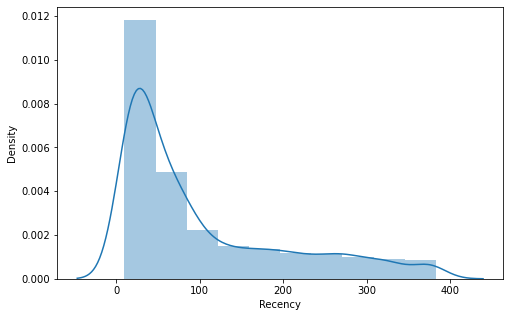

In [10]:
plt.figure(figsize=(8,5))
sns.distplot(df_recency['Recency'],bins=10,kde=True,rug=False)

# Frequency

In [11]:
df_frequency = df.copy()
df_frequency = df_frequency.groupby(by='CustomerID',as_index=False)['InvoiceNo'].nunique()
df_frequency.columns = ['CustomerID','Frequency']
df_frequency

,CustomerID,Frequency
0,12346.0,2
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1
...,...,...
4367,18280.0,1
4368,18281.0,1
4369,18282.0,3
4370,18283.0,16


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Frequency'>

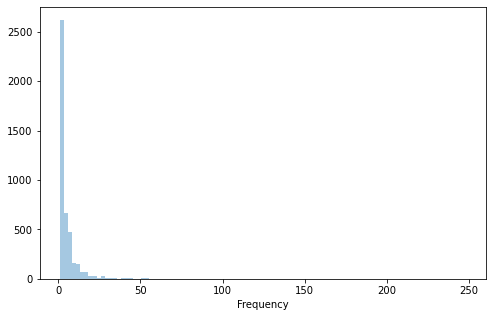

In [12]:
plt.figure(figsize=(8,5))
sns.distplot(df_frequency['Frequency'],bins=100,kde=False,rug=False)

# Monetary

In [13]:
df_monetary = df
df_monetary = df_monetary.groupby(by='CustomerID',as_index=False)['UnitPriceImp'].sum()

df_monetary.columns = ['CustomerID','Monetary']
df_monetary


,CustomerID,Monetary
0,12346.0,2.08
1,12347.0,481.21
2,12348.0,178.71
3,12349.0,605.10
4,12350.0,65.30
...,...,...
4367,18280.0,47.65
4368,18281.0,39.36
4369,18282.0,62.68
4370,18283.0,1220.93


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Monetary'>

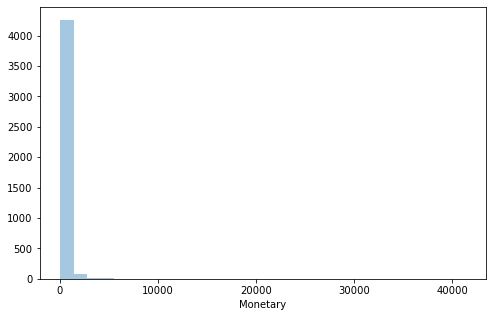

In [14]:
plt.figure(figsize=(8,5))
sns.distplot(df_monetary.Monetary,bins=30,kde=False,rug=False)

# Merging of rfm

In [15]:
rfm = df_recency.merge(df_frequency, on='CustomerID')
rfm

,CustomerID,Recency,Frequency
0,12346.0,335,2
1,12347.0,12,7
2,12348.0,85,4
3,12349.0,28,1
4,12350.0,320,1
...,...,...,...
4367,18280.0,287,1
4368,18281.0,190,1
4369,18282.0,17,3
4370,18283.0,13,16


In [16]:
rfm = rfm.merge(df_monetary, on= 'CustomerID')
rfm

,CustomerID,Recency,Frequency,Monetary
0,12346.0,335,2,2.08
1,12347.0,12,7,481.21
2,12348.0,85,4,178.71
3,12349.0,28,1,605.10
4,12350.0,320,1,65.30
...,...,...,...,...
4367,18280.0,287,1,47.65
4368,18281.0,190,1,39.36
4369,18282.0,17,3,62.68
4370,18283.0,13,16,1220.93


In [17]:
rfm.to_csv('rfm_data.csv', index = False)

# Starting with analysis

#### dataset is saved. Restart from here when starting the analysis

In [18]:
# import numpy as np
# import pandas as pd

# import matplotlib.pyplot as plt
# import seaborn as sns


In [19]:
rfm = pd.read_csv('rfm_data.csv')
rfm

,CustomerID,Recency,Frequency,Monetary
0,12346.0,335,2,2.08
1,12347.0,12,7,481.21
2,12348.0,85,4,178.71
3,12349.0,28,1,605.10
4,12350.0,320,1,65.30
...,...,...,...,...
4367,18280.0,287,1,47.65
4368,18281.0,190,1,39.36
4369,18282.0,17,3,62.68
4370,18283.0,13,16,1220.93


<AxesSubplot:xlabel='Recency', ylabel='Frequency'>

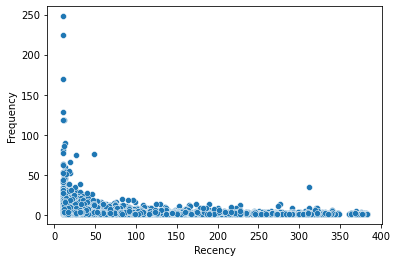

In [21]:
sns.scatterplot(data=rfm, y = 'Frequency', x = 'Recency')

<AxesSubplot:xlabel='Recency', ylabel='Monetary'>

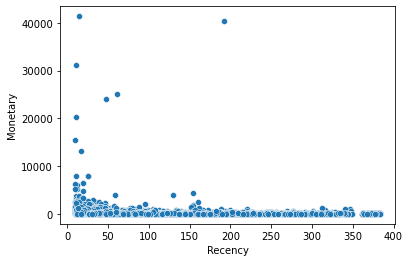

In [24]:
sns.scatterplot(data=rfm, y = 'Monetary', x = 'Recency')

<AxesSubplot:xlabel='Monetary', ylabel='Frequency'>

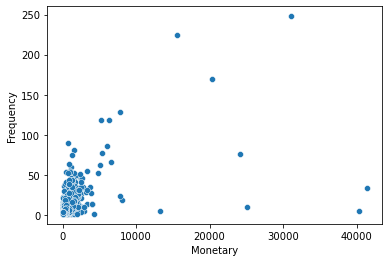

In [23]:
sns.scatterplot(data=rfm, y = 'Frequency', x = 'Monetary')